In [1]:
!pip install matplotlib

In [2]:
!pip install bio

     ------------------------------------ 321.1/321.1 kB 993.2 kB/s eta 0:00:00
     ---------------------------------------- 46.7/46.7 kB ? eta 0:00:00
     ---------------------------------------- 73.5/73.5 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 78.8/78.8 kB 2.2 MB/s eta 0:00:00


Motif positions: [1, 23]
GC Content: 50.00%
Coding Region: ATGCGTATCGTAGCGTAG
Protein Sequence: MRIVA*


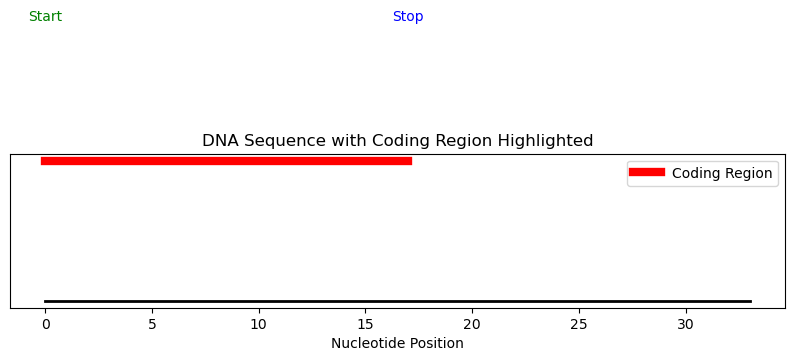

In [3]:
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction
import matplotlib.pyplot as plt

sequence = Seq("ATGCGTATCGTAGCGTAGCTAAATGCCCGGGTAA")

# 1. Finding motifs
motif = "ATG"
positions = [i+1 for i in range(len(sequence)-len(motif)+1)
              if sequence[i:i+len(motif)] == motif]
print("Motif positions:", positions)

# 2. Calculating GC content (using Biopython)
GC_content = gc_fraction(sequence)
print("GC Content: {:.2f}%".format(GC_content * 100))

# 3. Identifying coding region (translate to protein)
start = sequence.find("ATG")
stop_codons = ["TAA", "TAG", "TGA"]
coding_region = ""
stop_pos = -1
if start != -1:
    for i in range(start + 3, len(sequence), 3):
        if sequence[i:i+3] in stop_codons:
            coding_region = sequence[start:i+3]
            stop_pos = i + 3
            break
print("Coding Region:", coding_region)

# Translating coding region into protein sequence
if coding_region:
    protein = Seq(coding_region).translate()
    print("Protein Sequence:", protein)
else:
    print("No valid coding region found.")

# 4. Visualization of coding region
plt.figure(figsize=(10, 2))
plt.plot(range(len(sequence)), [1]*len(sequence), 'k-', linewidth=2)

if coding_region:
    plt.plot(range(start, stop_pos), [1.05]*len(coding_region), color="red", linewidth=6, label="Coding Region")

# Mark start and stop codon
if start != -1:
    plt.text(start, 1.1, "Start", color="green", ha="center")
if stop_pos != -1:
    plt.text(stop_pos-1, 1.1, "Stop", color="blue", ha="center")

plt.title("DNA Sequence with Coding Region Highlighted")
plt.xlabel("Nucleotide Position")
plt.yticks([])
plt.legend()
plt.show()

